In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy import stats
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from scipy.sparse import hstack
from folium.plugins import MarkerCluster

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data1 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110506644_20240320000000_20240520235900.csv')
data2 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110528739_20240320000000_20240520235900.csv')
data3 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110528754_20240320000000_20240520235900.csv')
data4 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110528853_20240320000000_20240520235900.csv')
data5 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110529570_20240320000000_20240520235900.csv')
data6 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110530230_20240320000000_20240520235900.csv')
data7 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110566549_20240320000000_20240520235900.csv')
data8 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110967663_20240320000000_20240520235900.csv')
data9 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110967788_20240320000000_20240520235900.csv')
data10 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110969693_20240320000000_20240520235900.csv')

<ipython-input-4-2017f85c54a2>:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data9 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110967788_20240320000000_20240520235900.csv')
<ipython-input-4-2017f85c54a2>:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data10 = pd.read_csv('/content/drive/MyDrive/dtc file/CAN2_BS6_352467110969693_20240320000000_20240520235900.csv')


In [5]:
datasets = {
    'Dataset 1': data1,
    'Dataset 2': data2,
    'Dataset 3': data3,
    'Dataset 4': data4,
    'Dataset 5': data5,
    'Dataset 6': data6,
    'Dataset 7': data7,
    'Dataset 8': data8,
    'Dataset 9': data9,
    'Dataset 10': data10
}

In [6]:
#data Overview
for name, df in datasets.items():
    print(f"\n{name} Information:")
    print(df.info())
    print()
    print("\nFirst 5 rows:")
    print(df.head())
    print()
    print("\nMissing values:")
    print(df.isnull().sum())
    print()
    print("\nDescriptive statistics:")
    print(df.describe())


Dataset 1 Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95794 entries, 0 to 95793
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spn                 95794 non-null  int64  
 1   fmi                 95794 non-null  int64  
 2   cm                  95794 non-null  int64  
 3   dtccode             95784 non-null  object 
 4   ftb                 85858 non-null  object 
 5   discription         95784 non-null  object 
 6   occuranceCount      95794 non-null  int64  
 7   devID               95794 non-null  int64  
 8   eDateTime           95794 non-null  int64  
 9   latitude            95794 non-null  float64
 10  longitude           95794 non-null  float64
 11  utc                 95794 non-null  int64  
 12  numberOfFaultCodes  95794 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 9.5+ MB
None


First 5 rows:
    spn  fmi  cm dtccode ftb  \
0   131    5   0 

In [7]:
# Data Cleaning
for name, df in datasets.items():
    df.fillna(method='ffill', inplace=True)
    df['utc'] = pd.to_datetime(df['utc'])
    df['latitude'] = df['latitude'].astype(float)
    df['longitude'] = df['longitude'].astype(float)
    print(f"\n{name} after cleaning:")
    print(df.info())

<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj


Dataset 1 after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95794 entries, 0 to 95793
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   spn                 95794 non-null  int64         
 1   fmi                 95794 non-null  int64         
 2   cm                  95794 non-null  int64         
 3   dtccode             95794 non-null  object        
 4   ftb                 95794 non-null  object        
 5   discription         95794 non-null  object        
 6   occuranceCount      95794 non-null  int64         
 7   devID               95794 non-null  int64         
 8   eDateTime           95794 non-null  int64         
 9   latitude            95794 non-null  float64       
 10  longitude           95794 non-null  float64       
 11  utc                 95794 non-null  datetime64[ns]
 12  numberOfFaultCodes  95794 non-null  int64         
dtypes: datetime64[ns](1

<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-342f9f70cf03>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
#combining the data sets
com_dataset= pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], axis=0)
com_dataset.reset_index(drop=True, inplace=True)
print(com_dataset.head())

    spn  fmi  cm dtccode ftb  \
0   131    5   0   P0470  13   
1  1074    5   0   P0475  13   
2  1188    5   0   P0243  13   
3   131    2   0   P0470  64   
4   131    5   0   P0470  13   

                                         discription  occuranceCount  \
0                        Exhaust Pressure Sensor "A"             126   
1                  Exhaust brake relay open circuit.               1   
2  Engine Turbocharger Wastegate Actuator 1 Posit...               1   
3                        Exhaust Pressure Sensor "A"              28   
4                        Exhaust Pressure Sensor "A"             126   

             devID       eDateTime  latitude  longitude  \
0  352467110506644  20240401074301  27.28227   74.20377   
1  352467110506644  20240401074301  27.28227   74.20377   
2  352467110506644  20240401074301  27.28227   74.20377   
3  352467110506644  20240401074301  27.28227   74.20377   
4  352467110506644  20240401074401  27.28223   74.20379   

                   

In [9]:
com_dataset.describe()

,spn,fmi,cm,occuranceCount,devID,eDateTime,latitude,longitude,utc,numberOfFaultCodes
count,441856.000000,441856.000000,441856.000000,441856.000000,4.418560e+05,4.418560e+05,441856.000000,441856.000000,441856,441856.000000
mean,151508.681643,5.850764,0.397177,23.213434,3.524671e+14,2.024043e+13,21.335225,78.969165,1970-01-01 00:00:00.766974687,3.544847
min,0.000000,0.000000,0.000000,0.000000,3.524671e+14,2.024032e+13,0.000000,0.000000,1970-01-01 00:00:00.764188233,1.000000
25%,677.000000,5.000000,0.000000,1.000000,3.524671e+14,2.024041e+13,19.819600,78.380840,1970-01-01 00:00:00.765954253,2.000000
50%,2636.000000,6.000000,0.000000,1.000000,3.524671e+14,2.024042e+13,20.254910,78.955890,1970-01-01 00:00:00.767064497,4.000000
75%,520416.000000,6.000000,1.000000,41.000000,3.524671e+14,2.024050e+13,22.321360,79.258270,1970-01-01 00:00:00.767907397,4.000000
max,521203.000000,31.000000,1.000000,127.000000,3.524671e+14,2.024052e+13,31.377830,86.232420,1970-01-01 00:00:00.769544940,15.000000
std,235278.264237,3.200024,0.489314,37.166588,2.218644e+05,5.510200e+07,2.518626,2.402643,NaN,1.782791


In [ ]:
#Display unique DTC codes and their descriptions
unique_dtc_info = com_dataset[['dtccode', 'discription']].drop_duplicates()
pd.set_option('display.max_rows', None)
print("Unique DTC Codes and Discriptions:")
print(unique_dtc_info)
pd.reset_option('display.max_rows')

Unique DTC Codes and Discriptions:
           dtccode                                        discription
0            P0470                        Exhaust Pressure Sensor "A"
1            P0475                  Exhaust brake relay open circuit.
2            P0243  Engine Turbocharger Wastegate Actuator 1 Posit...
584          P202D                                  Reductant Leakage
4073         P0470  Exhaust Pressure Sensor "A"General Electrical ...
4747         P111E         Engine Coolant Temperature Moderately High
9465    NoDTCFound                                           NotFound
9467         P103C             SCR NOx Catalyst Efficiency Inducement
9469         P20EE                    SCR conversion efficiency low1.
9622         P244A  Particulate Filter Differential Pressure Too Low 
21567        P0217  Engine Overheat fault while Coolant temperatur...
27239        C1001  PTO2 Valve output: Circuit short to Ground or ...
36148        P0470                          Exhaust Pre

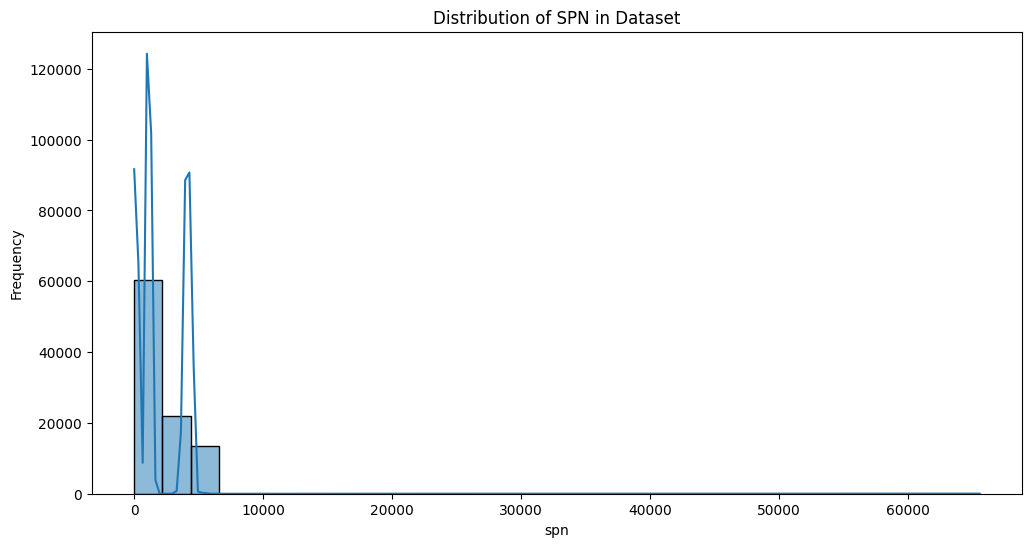

In [ ]:
#Visualize Distributions
def plot_distribution(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_distribution(data1, 'spn', 'Distribution of SPN in Dataset')

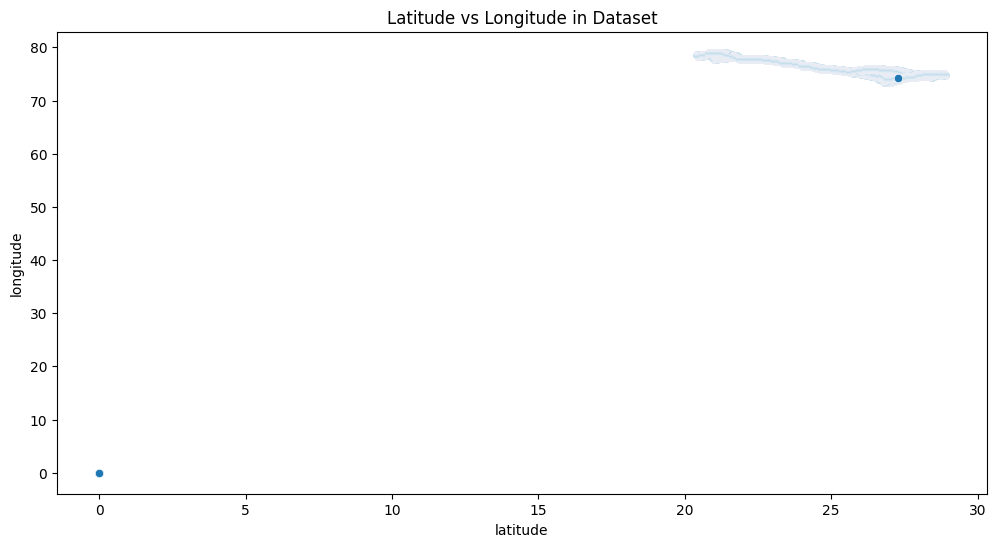

In [ ]:
# Relationship Analysis
def plot_scatter(df, x, y, title):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

plot_scatter(data1, 'latitude', 'longitude', 'Latitude vs Longitude in Dataset')

In [ ]:
numerical_columns1 = ['spn', 'fmi', 'cm', 'occuranceCount', 'latitude', 'longitude', 'utc', 'numberOfFaultCodes']
numerical_columns2 = ['spn', 'fmi', 'cm', 'occuranceCount', 'latitude', 'longitude', 'utc', 'numberOfFaultCodes']

In [ ]:
# Correlation analysis for the dataset
correlation_matrix1 = data1[numerical_columns1].corr()
print('Correlation matrix for Dataset 1:')
print(correlation_matrix1)
print("---------------------------------------------------------------------------------------------------")

correlation_matrix2 = data2[numerical_columns2].corr()
print('Correlation matrix for Dataset 2:')
print(correlation_matrix2)
print("----------------------------------------------------------------------------------------------------")
print()

correlation_matrix1 = data3[numerical_columns1].corr()
print('Correlation matrix for Dataset 3:')
print(correlation_matrix1)
print("----------------------------------------------------------------------------------------------------")
print()

correlation_matrix2 = data4[numerical_columns2].corr()
print('Correlation matrix for Dataset 4:')
print(correlation_matrix2)
print("------------------------------------------------------------------------------------------------------")
print()

correlation_matrix1 = data5[numerical_columns1].corr()
print('Correlation matrix for Dataset 5:')
print(correlation_matrix1)
print("------------------------------------------------------------------------------------------------------")
print()

correlation_matrix2 = data6[numerical_columns2].corr()
print('Correlation matrix for Dataset 6:')
print(correlation_matrix2)
print("-------------------------------------------------------------------------------------------------------")
print()

correlation_matrix1 = data7[numerical_columns1].corr()
print('Correlation matrix for Dataset 7:')
print(correlation_matrix1)
print("-------------------------------------------------------------------------------------------------------")
print()

correlation_matrix2 = data8[numerical_columns2].corr()
print('Correlation matrix for Dataset 8:')
print(correlation_matrix2)
print("--------------------------------------------------------------------------------------------------------")
print()

correlation_matrix1 = data9[numerical_columns1].corr()
print('Correlation matrix for Dataset 9:')
print(correlation_matrix1)
print("--------------------------------------------------------------------------------------------------------")
print()

correlation_matrix2 = data10[numerical_columns2].corr()
print('Correlation matrix for Dataset 10:')
print(correlation_matrix2)
print("--------------------------------------------------------------------------------------------------------")
print()

Correlation matrix for Dataset 1:
                         spn       fmi        cm  occuranceCount  latitude  \
spn                 1.000000 -0.019511  0.402398       -0.013540 -0.049563   
fmi                -0.019511  1.000000  0.112740       -0.177928 -0.085257   
cm                  0.402398  0.112740  1.000000       -0.166437  0.084264   
occuranceCount     -0.013540 -0.177928 -0.166437        1.000000 -0.083590   
latitude           -0.049563 -0.085257  0.084264       -0.083590  1.000000   
longitude           0.053606  0.071013 -0.060360        0.057328 -0.730752   
utc                 0.086648  0.027287  0.260468       -0.415376  0.114803   
numberOfFaultCodes  0.186975  0.126560 -0.150114        0.103190 -0.376855   

                    longitude       utc  numberOfFaultCodes  
spn                  0.053606  0.086648            0.186975  
fmi                  0.071013  0.027287            0.126560  
cm                  -0.060360  0.260468           -0.150114  
occuranceCount 

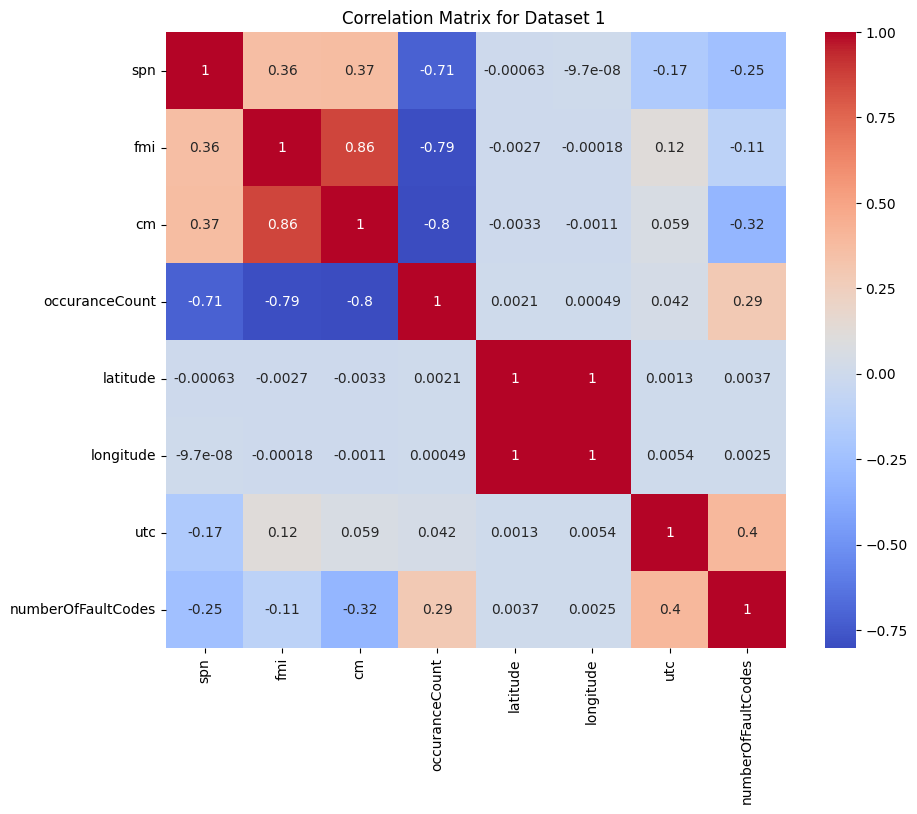

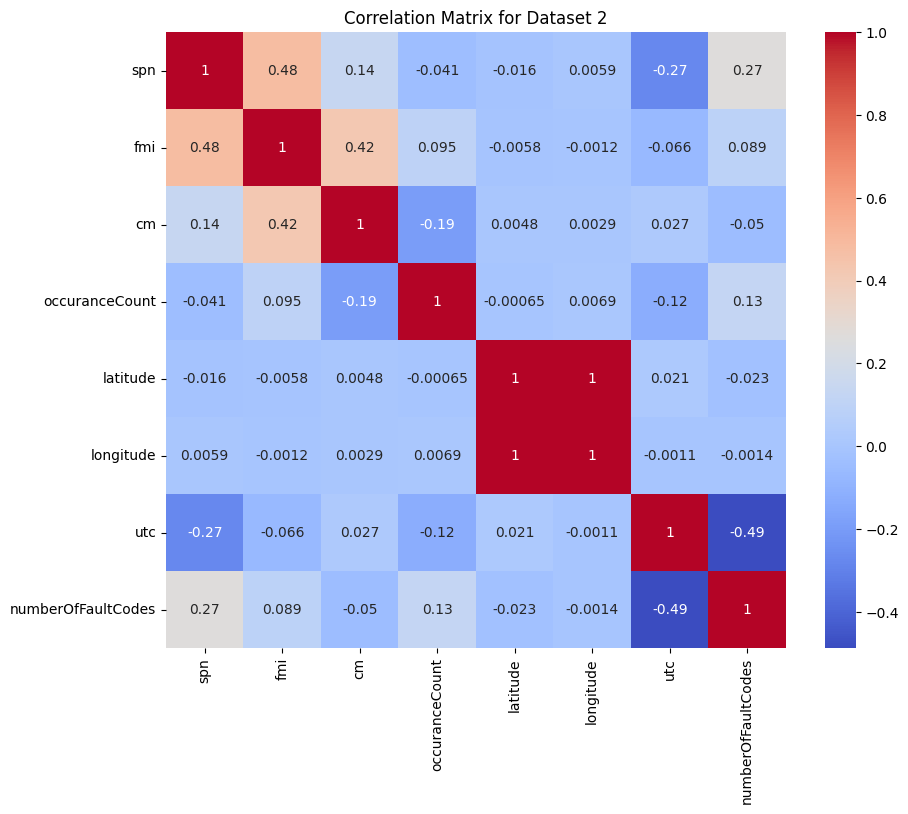

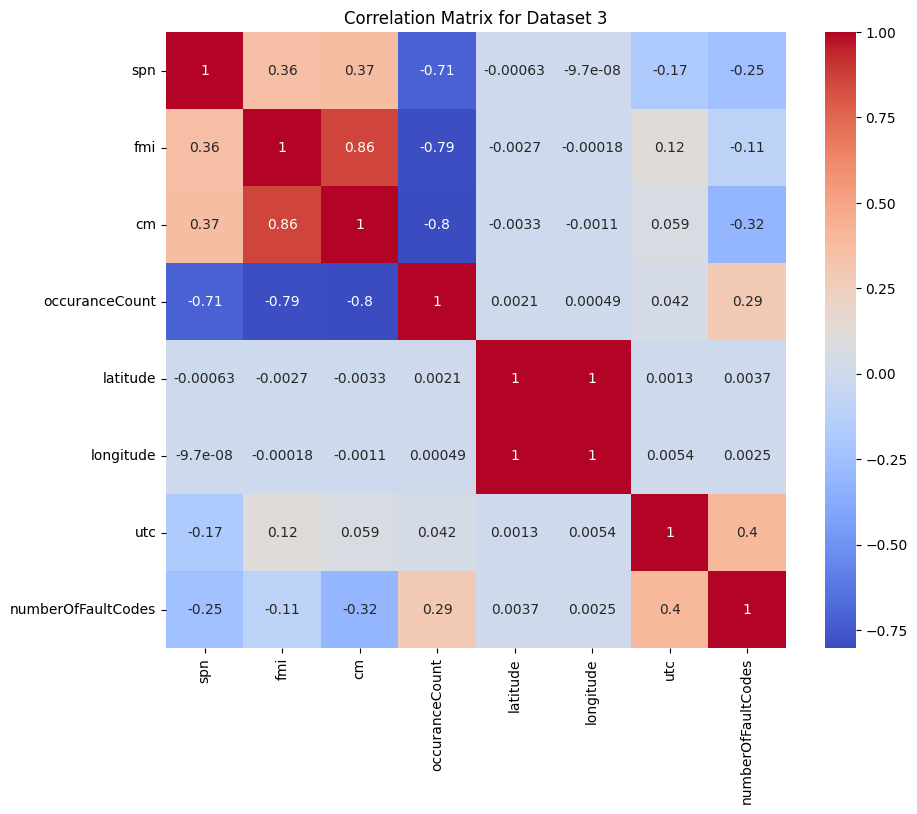

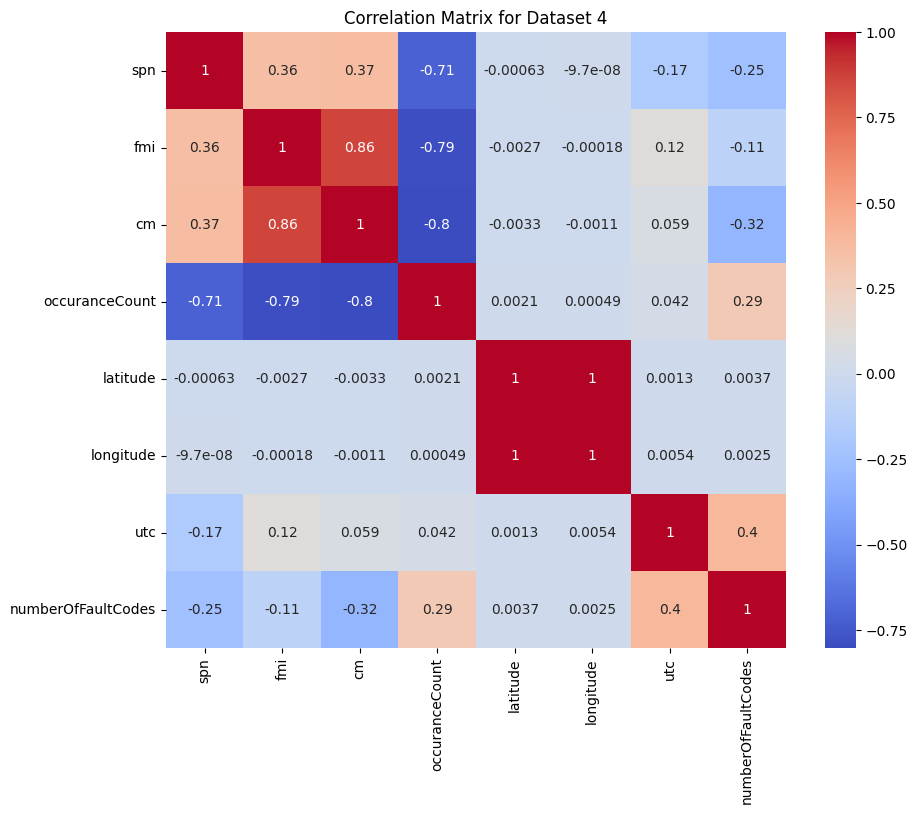

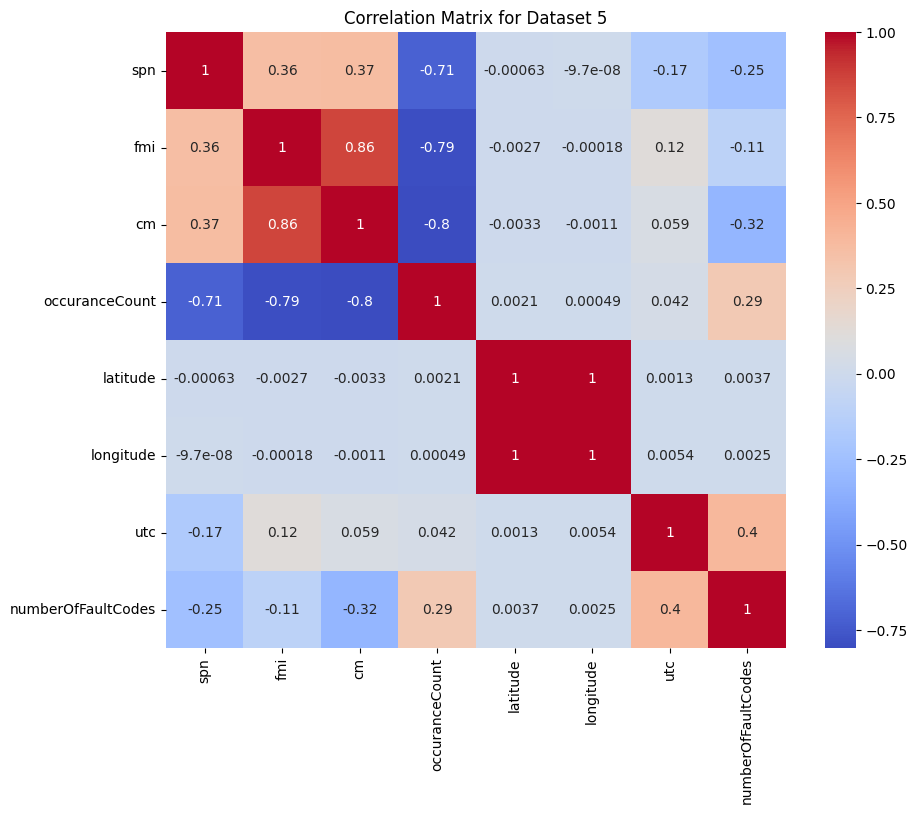

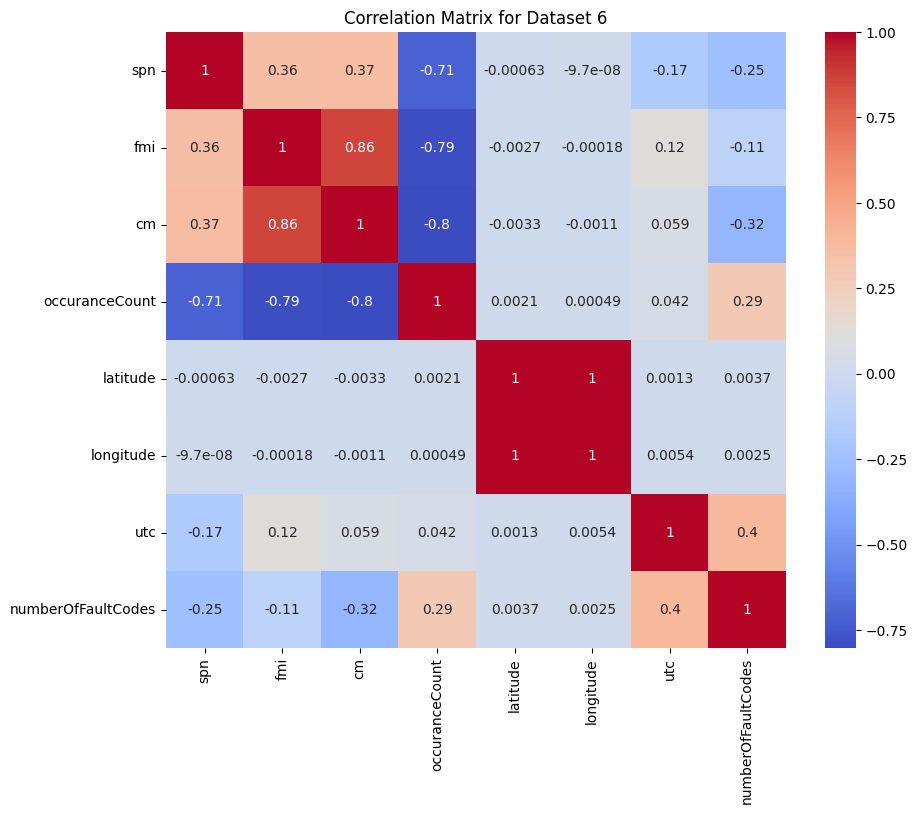

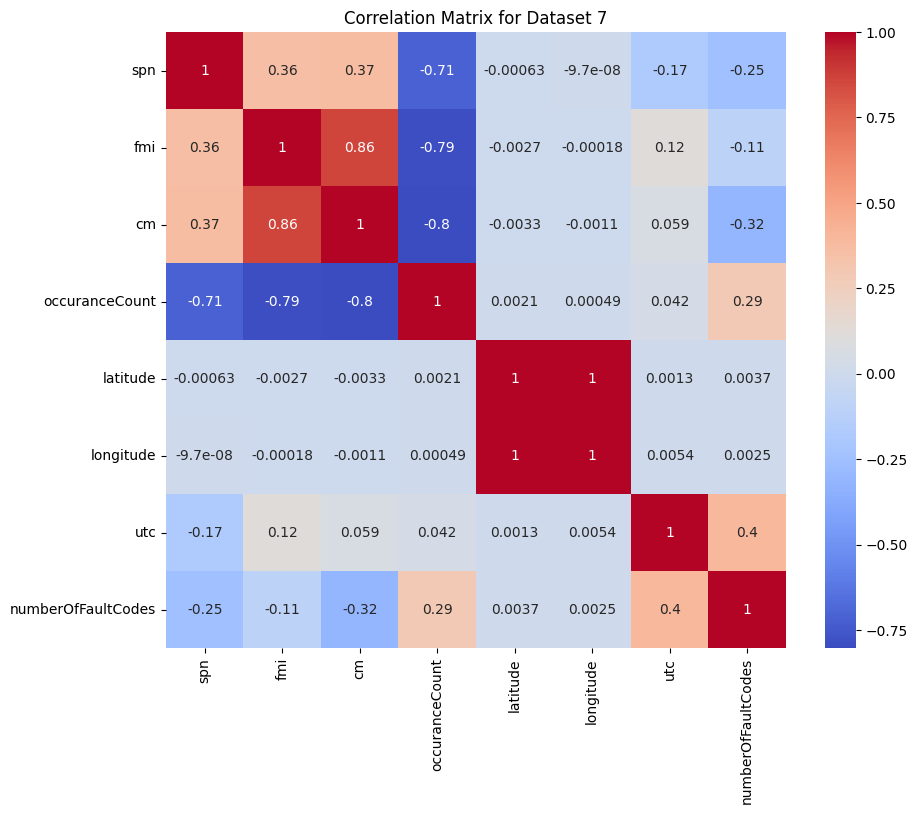

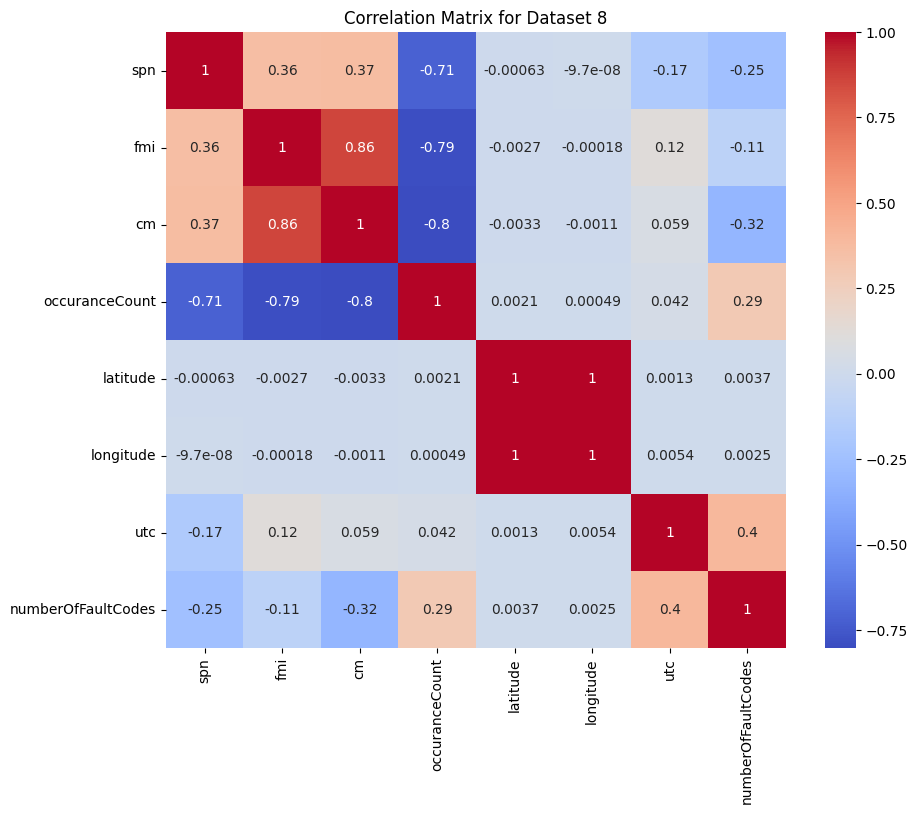

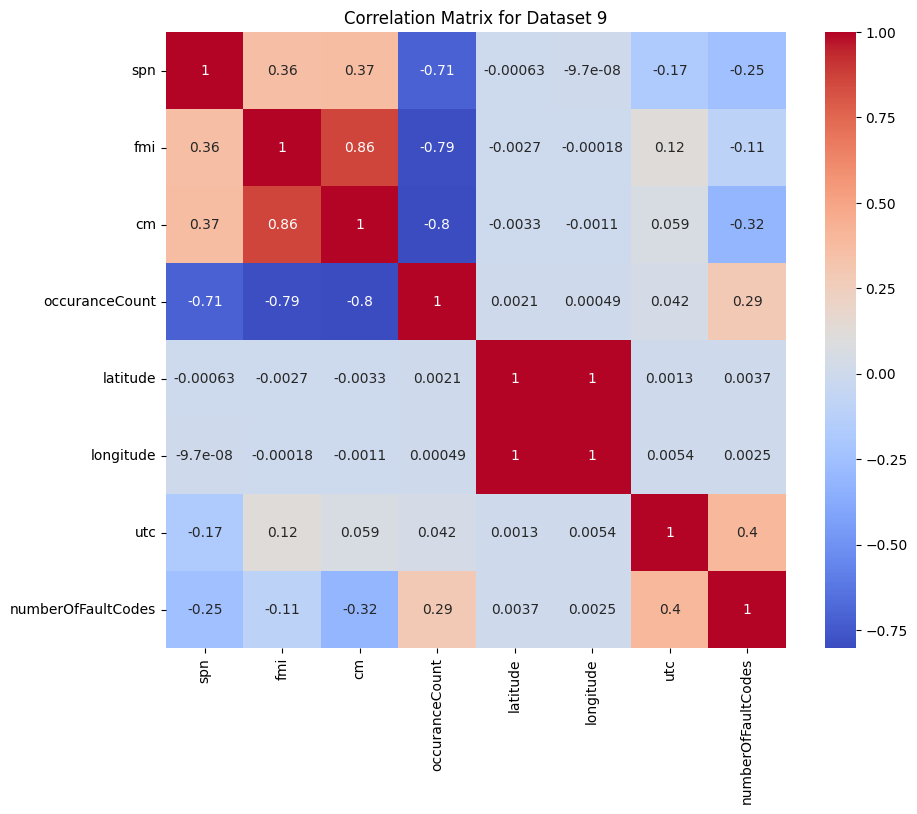

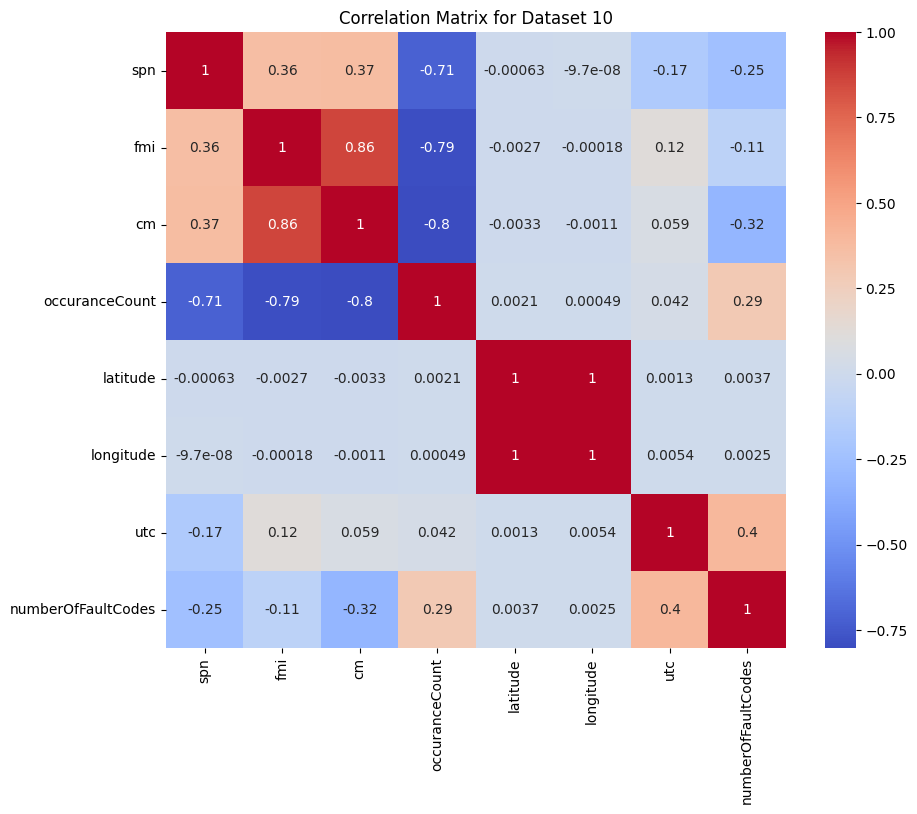

In [ ]:
# Plot heatmaps for correlation matrices
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 1 ')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 2')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 3')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 4')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 5')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 6')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 7')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 8')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 9')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Dataset 10')
plt.show()

<Figure size 1500x1000 with 0 Axes>

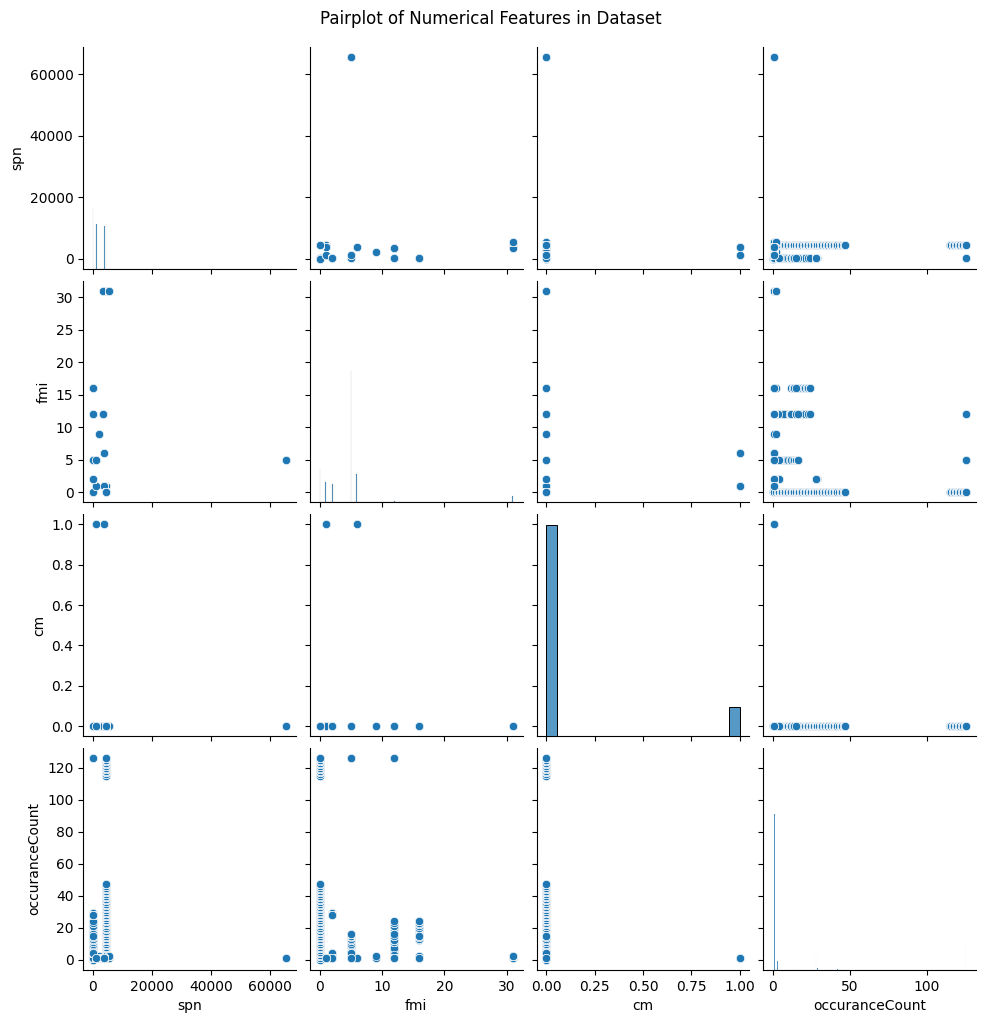

In [ ]:
def plot_pairplot(df, columns, title):
    plt.figure(figsize=(15, 10))
    sns.pairplot(df[columns])
    plt.suptitle(title, y=1.02)
    plt.show()

plot_pairplot(data1, ['spn', 'fmi', 'cm', 'occuranceCount'], 'Pairplot of Numerical Features in Dataset ')


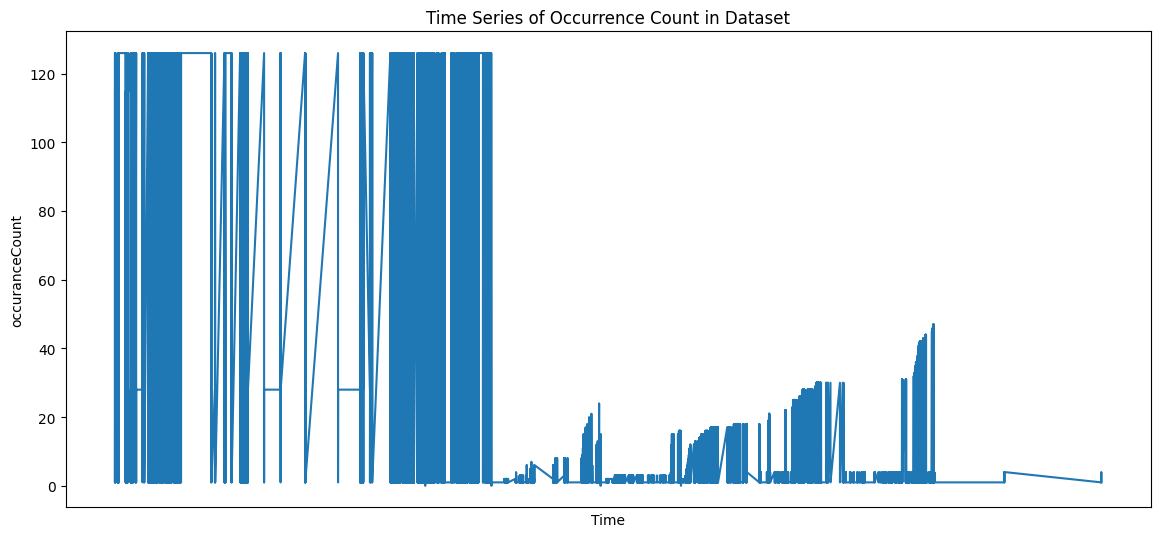

In [ ]:
 #Time Series Analysis
def plot_time_series(df, date_column, value_column, title):
    plt.figure(figsize=(14, 7))
    df.set_index(date_column)[value_column].plot()
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(value_column)
    plt.show()

plot_time_series(data1, 'utc', 'occuranceCount', 'Time Series of Occurrence Count in Dataset')


In [ ]:
# Outlier Detection
def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
    outliers = np.where(z_scores > threshold)
    return outliers
print(detect_outliers_zscore)

<function detect_outliers_zscore at 0x7f98c2eacc10>


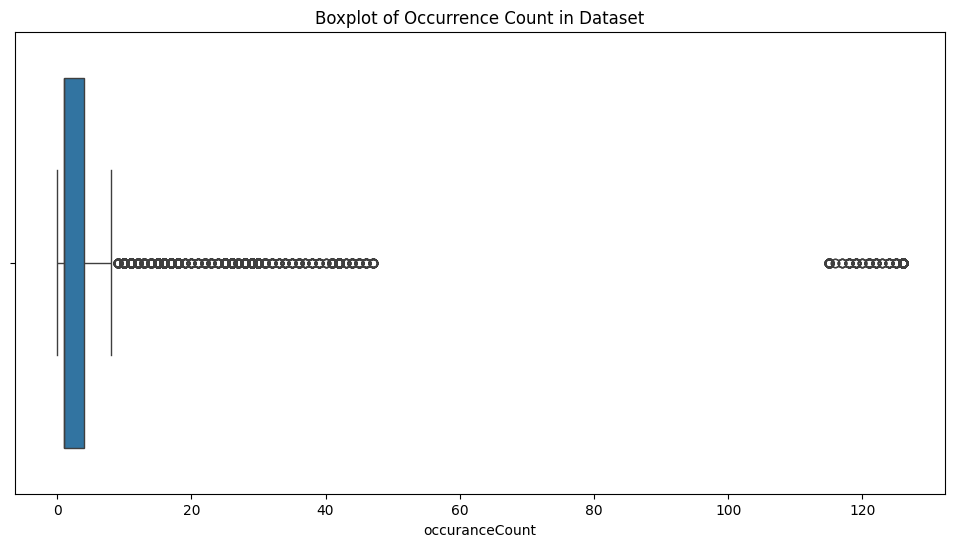

In [ ]:
# Anomaly Detection
def plot_boxplot(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

plot_boxplot(data1, 'occuranceCount', 'Boxplot of Occurrence Count in Dataset')


In [ ]:
for name, df in datasets.items():
    df.fillna(method='ffill', inplace=True)
    df['utc'] = pd.to_datetime(df['utc'])
    df['latitude'] = df['latitude'].astype(float)
    df['longitude'] = df['longitude'].astype(float)

In [ ]:
 #Createing pivot tables for each dataset
pivot_data1 = data1.pivot_table(index='discription', columns='dtccode', aggfunc='size', fill_value=0)
pivot_data2 = data2.pivot_table(index='fmi', columns='dtccode', aggfunc='size', fill_value=0)
pivot_data3 = data3.pivot_table(index='cm', columns='dtccode', aggfunc='size', fill_value=0)
pivot_data4 = data4.pivot_table(index='ftb', columns='dtccode', aggfunc='size', fill_value=0)
pivot_data5 = data5.pivot_table(index='occuranceCount', columns='dtccode', aggfunc='size', fill_value=0)
pivot_data6 = data6.pivot_table(index='devID', columns='dtccode', aggfunc='size', fill_value=0)
pivot_data7 = data7.pivot_table(index='eDateTime', columns='dtccode', aggfunc='size', fill_value=0)
pivot_data8 = data8.pivot_table(index='utc', columns='dtccode', aggfunc='size', fill_value=0)
pivot_data9 = data9.pivot_table(index='numberOfFaultCodes', columns='dtccode', aggfunc='size', fill_value=0)

In [ ]:
 #Computeing correlation matrices
corr_matrix1 = pivot_data1.corr()
corr_matrix2 = pivot_data2.corr()
corr_matrix3 = pivot_data3.corr()
corr_matrix4 = pivot_data4.corr()
corr_matrix5 = pivot_data5.corr()
corr_matrix6 = pivot_data6.corr()
corr_matrix7 = pivot_data7.corr()
corr_matrix8 = pivot_data8.corr()
corr_matrix9 = pivot_data9.corr()

In [ ]:
#Saveing the correlation matrices to CSV files
corr_matrix1.to_csv('/content/drive/MyDrive/matrix/matrix1.csv')
corr_matrix2.to_csv('/content/drive/MyDrive/matrix/matrix2.csv')
corr_matrix3.to_csv('/content/drive/MyDrive/matrix/matrix3.csv')
corr_matrix4.to_csv('/content/drive/MyDrive/matrix/matrix4.csv')
corr_matrix5.to_csv('/content/drive/MyDrive/matrix/matrix5.csv')
corr_matrix6.to_csv('/content/drive/MyDrive/matrix/matrix6.csv')
corr_matrix7.to_csv('/content/drive/MyDrive/matrix/matrix7.csv')
corr_matrix8.to_csv('/content/drive/MyDrive/matrix/matrix8.csv')
corr_matrix9.to_csv('/content/drive/MyDrive/matrix/matrix9.csv')

#DISCRIPTION
====
Dataset 1:

All correlations are near zero or slightly negative, indicating weak relationships between DTC codes.   
Key Observation: No strong correlation between most DTC codes.
____________________
Dataset 2:

Moderate Correlations: Some DTC codes like B150C and NoDTCFound have a moderate negative correlation of -0.375.    
Key Observation: Some DTC codes are negatively correlated, suggesting inverse relationships.
______________
Dataset 3:

Strong Correlations: NoDTCFound, P0070, and P0090 show strong positive and negative correlations with others, such as 1.0 and -1.0.   
Key Observation: Highly correlated DTC codes, either strongly positive or negative.
________
Dataset 4:

Mixed Correlations: Some DTC codes have perfect positive or negative correlations (1.000 or -0.166667).   
Key Observation: Strong correlations among some DTC codes, with some negative correlations.
___________________
Dataset 5:

Varied Correlations: NoDTCFound has a strong positive correlation with U010E (0.702247), but negative or weak correlations with others.   
Key Observation: Mixed correlations, with some strong positive and weak or negative correlations.
____________________
Dataset 6:

Missing Data: All values are NaN, indicating missing or incomplete data.
_________________
Dataset 7:

Diverse Correlations: Moderate positive correlations among NoDTCFound, P2047, P204F, and P208A.   
Key Observation: Some DTC codes are positively correlated, while others have weaker relationships.
_________________
Dataset 8:

Weak Correlations: Most correlations are close to zero, indicating weak or no relationships.   
Key Observation: Minimal correlations between DTC codes.
_____________________
Dataset 9:

Mixed Correlations: Strong positive correlations between C1001 and NoDTCFound (0.941582), and varied correlations with other codes.   
Key Observation: Some strong correlations and a mix of positive and negative relationships.
________________

In [ ]:
 #Display the first few rows of each correlation matrix
print("\nCorrelation Matrix for Dataset 1:\n", corr_matrix1.head())
print("\nCorrelation Matrix for Dataset 2:\n", corr_matrix2.head())
print("\nCorrelation Matrix for Dataset 3:\n", corr_matrix3.head())
print("\nCorrelation Matrix for Dataset 4:\n", corr_matrix4.head())
print("\nCorrelation Matrix for Dataset 5:\n", corr_matrix5.head())
print("\nCorrelation Matrix for Dataset 6:\n", corr_matrix6.head())
print("\nCorrelation Matrix for Dataset 7:\n", corr_matrix7.head())
print("\nCorrelation Matrix for Dataset 8:\n", corr_matrix8.head())
print("\nCorrelation Matrix for Dataset 9:\n", corr_matrix9.head())


Correlation Matrix for Dataset 1:
 dtccode        C1001  NoDTCFound     P0217     P0243     P0470     P0475  \
dtccode                                                                    
C1001       1.000000   -0.058824 -0.058824 -0.058824 -0.085861 -0.058824   
NoDTCFound -0.058824    1.000000 -0.058824 -0.058824 -0.085861 -0.058824   
P0217      -0.058824   -0.058824  1.000000 -0.058824 -0.085861 -0.058824   
P0243      -0.058824   -0.058824 -0.058824  1.000000 -0.085861 -0.058824   
P0470      -0.085861   -0.085861 -0.085861 -0.085861  1.000000 -0.085861   

dtccode        P103C     P111E     P202D     P204F     P206A     P20E8  \
dtccode                                                                  
C1001      -0.058824 -0.058824 -0.058824 -0.058824 -0.058824 -0.058824   
NoDTCFound -0.058824 -0.058824 -0.058824 -0.058824 -0.058824 -0.058824   
P0217      -0.058824 -0.058824 -0.058824 -0.058824 -0.058824 -0.058824   
P0243      -0.058824 -0.058824 -0.058824 -0.058824 -0.058824 

Metrics:
===
Precision: Accuracy of positive predictions.   
Recall: Ability to find all positive instances.   
F1-Score: Harmonic mean of precision and recall.  
Support: Number of actual instances of each class.

Report Highlights:
----
Most Classes: Metrics are perfect (1.00), indicating correct classification.  
Some Classes: Low metrics (0.00), meaning no instances were correctly predicted.   
Macro Average: Precision, Recall, and F1-Score are all 0.98, treating all classes equally.   
Weighted Average: Metrics are 1.00, reflecting overall model performance.  

"Warning:"
---
UndefinedMetricWarning: Some classes have no predicted samples, leading to 0.0 precision and F1-score. Use zero_division parameter to handle this.

In [ ]:
# Ensure columns exist
assert 'discription' in com_dataset.columns
assert 'latitude' in com_dataset.columns
assert 'longitude' in com_dataset.columns
assert 'dtccode' in com_dataset.columns

In [ ]:
# Prepare features and target
X = com_dataset[['discription', 'latitude', 'longitude']]
y = com_dataset['dtccode']

In [ ]:
X['discription'] = X['discription'].fillna('')

<ipython-input-88-e08ca8285887>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['discription'] = X['discription'].fillna('')


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Text preprocessing
text_imputer = SimpleImputer(strategy='constant', fill_value='')
X_train_discription = text_imputer.fit_transform(X_train[['discription']].values)
X_test_discription = text_imputer.transform(X_test[['discription']].values)

tfidf = TfidfVectorizer(max_features=1000)
X_train_discription_tfidf = tfidf.fit_transform(X_train_discription.ravel())
X_test_discription_tfidf = tfidf.transform(X_test_discription.ravel())

In [ ]:
# Coordinates preprocessing
coords_imputer = SimpleImputer(strategy='mean')
X_train_coords = coords_imputer.fit_transform(X_train[['latitude', 'longitude']])
X_test_coords = coords_imputer.transform(X_test[['latitude', 'longitude']])

scaler = StandardScaler()
X_train_coords_scaled = scaler.fit_transform(X_train_coords)
X_test_coords_scaled = scaler.transform(X_test_coords)

In [ ]:
# Combine preprocessed data
X_train_combined = hstack([X_train_discription_tfidf, X_train_coords_scaled])
X_test_combined = hstack([X_test_discription_tfidf, X_test_coords_scaled])

In [ ]:
# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_combined, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred = clf.predict(X_test_combined)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B150C       1.00      1.00      1.00         1
       B151A       1.00      1.00      1.00       904
       C1001       1.00      1.00      1.00      1229
  NoDTCFound       1.00      1.00      1.00     23695
       P0070       1.00      1.00      1.00      1085
       P0090       1.00      1.00      1.00         3
       P009B       1.00      1.00      1.00       255
       P0105       1.00      1.00      1.00        12
       P0110       1.00      1.00      1.00         4
       P0115       1.00      1.00      1.00      4793
       P0121       1.00      1.00      1.00      1203
       P0185       1.00      1.00      1.00         2
       P0190       1.00      1.00      1.00         3
       P0217       1.00      1.00      1.00        10
       P0243       1.00      1.00      1.00      4183
       P0470       1.00      1.00      1.00     13102
       P0475       1.00      1.00      1.00      5922
       P0520       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GRAPHICAL REPRESENTATION
Using a Sample data from the whole dataset


In [ ]:
sample_data = pd.read_excel('/content/drive/MyDrive/dtc file/sample data.xlsx')

In [ ]:
def visualize_dtc_locations(sample_data, lat_col='latitude', lon_col='longitude', dtc_col='dtccode', desc_col='discription'):
    # Create a map centered around the mean latitude and longitude
    m = folium.Map(location=[sample_data[lat_col].mean(), sample_data[lon_col].mean()], zoom_start=6)

    # Create a MarkerCluster object
    marker_cluster = MarkerCluster().add_to(m)

    # Define a custom HTML template for the popup
    popup_template = """
    <div style="width: 300px; padding: 10px; border: 1px solid #ccc; border-radius: 5px; background-color: #f9f9f9;">
        <h4 style="margin-top: 0; color: #007bff;">DTC Code: {dtc_code}</h4>
        <p style="margin: 5px 0;"><strong>Description:</strong> {description}</p>
        <p style="margin: 5px 0;"><strong>Latitude:</strong> {latitude}</p>
        <p style="margin: 5px 0;"><strong>Longitude:</strong> {longitude}</p>
    </div>
    """

    # Add points to the map with styled popups
    for idx, row in sample_data.iterrows():
        popup_content = folium.Popup(f"""
        <div style="width: 300px;">
            <h4 style="margin-top: 0; color: #007bff;">DTC Code: {row[dtc_col]}</h4>
            <p style="margin: 5px 0;"><strong>Description:</strong> {row[desc_col]}</p>
            <p style="margin: 5px 0;"><strong>Latitude:</strong> {row[lat_col]}</p>
            <p style="margin: 5px 0;"><strong>Longitude:</strong> {row[lon_col]}</p>
        </div>
        """, max_width=300)

        folium.Marker(
            location=[row[lat_col], row[lon_col]],
            popup=popup_content,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

    return m

In [ ]:
# Visualize the DTC locations
dtc_map = visualize_dtc_locations(sample_data)

In [ ]:
# Save map to an HTML file and display
dtc_map.save("dtc_map.html")
dtc_map